# Tutorial on LSTM

## Diego Tuccillo

The data are stock prices of APPLE  downloaded from Yahoo Finance.

https://finance.yahoo.com/quote/AAPL/history?p=AAPL&.tsrc=fin-srch

In [1]:
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd  
from keras.models import Sequential  
from keras.layers import Dense  
from keras.layers import LSTM  
from keras.layers import Dropout 

Using TensorFlow backend.


In [3]:
#import data in Colab
! git clone https://github.com/Simmetria0/data.git


#Of course from your laptop you just need the usual
#data = pd.read_csv('stock_data.csv') 

fatal: destination path 'data' already exists and is not an empty directory.
data  sample_data


In [4]:
! ls

data  sample_data


In [0]:
data = pd.read_csv('data/stock_data.csv') 

In [6]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1531.000000,1531.000000,1531.000000,1531.000000,1531.000000,1.531000e+03
mean,120.999114,122.058477,119.918809,121.008258,113.783728,5.262149e+07
std,41.577734,41.937872,41.207180,41.588037,44.931320,3.556163e+07
min,55.424286,57.085712,55.014286,55.790001,41.125267,1.147590e+07
25%,93.350003,94.064999,92.264999,93.410000,86.281616,2.837555e+07
50%,113.459999,114.360001,112.309998,113.489998,106.948166,4.209060e+07
75%,153.190002,153.985001,151.320000,153.105003,148.918037,6.553960e+07
max,230.779999,233.470001,229.779999,232.070007,229.392090,3.652131e+08


In [7]:
print(data.shape)
data.head(5)

(1531, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-12-31,72.932854,76.485718,72.714287,76.024284,53.767834,164873100
1,2013-01-02,79.117142,79.285713,77.375717,78.432854,55.471294,140129500
2,2013-01-03,78.268570,78.524284,77.285713,77.442856,54.771122,88241300
3,2013-01-04,76.709999,76.947144,75.118568,75.285713,53.245483,148583400
4,2013-01-07,74.571426,75.614288,73.599998,74.842857,52.932274,121039100


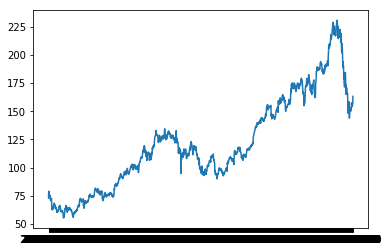

In [0]:
plt.plot(data.Date, data.Open)
plt.show()

In [0]:
#We are only interested in the opening price of the stock.

series = data.iloc[:, 1:2].values 

In [9]:
# And now let's apply the ML steps:
#1) Normalization
from sklearn.preprocessing import MinMaxScaler  
scaler = MinMaxScaler(feature_range = (0, 1))

series_scaled = scaler.fit_transform(series)  

series_scaled.shape

(1531, 1)

---
We are going to predict the opening stock price of the data based on the opening stock prices for the past 60 days. You can change of course this number, is the lag. You can try different numbers and see how your algorithm performs.

Our feature set should contain the opening stock price values for the past 60 days while the label or dependent variable should be the stock price at the 61st day. 

---

In [0]:
# Convert Training Data to Right Shape
features_set = []  
labels = []  
for i in range(60, 1531):  
    features_set.append(series_scaled[i-60:i, 0])
    labels.append(series_scaled[i, 0])


    
    

In [28]:
print(len(features_set))
print(len(labels))

1471
1471


In [0]:
#Right shape to feed the LSTM:
#A) Convert both the feature_set and the labels list to the numpy array 
features_set, labels = np.array(features_set), np.array(labels)  



B) We need to convert our data into the shape accepted by the LSTM. We need to convert our data into three-dimensional format. 
- The first dimension is the number of records or rows in the dataset. 
- The second dimension is the number of time steps which is 60 
- while the last dimension is the number of indicators. Since we are only using one feature, i.e Open, it is 1

In [0]:
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))  


In [35]:
print(features_set.shape)
print (labels.shape)

(1471, 60, 1)
(1471,)


In [38]:
#Divide in Train and test
train_set = features_set[:1200,:,:]
train_labels = labels[:1200]
test_set = features_set[1200:,:,:]
test_labels = labels[1200:]

print(train_labels.shape)
print(test_labels.shape)

(1200,)
(271,)


In [0]:
# Create the Network

def myModel():
    model = Sequential() 
    model.add(LSTM(units=50, return_sequences=True, input_shape=(features_set.shape[1], 1)))  
    model.add(Dropout(0.2))  
    model.add(LSTM(units=50, return_sequences=True))  
    model.add(Dropout(0.2))

    model.add(LSTM(units=50, return_sequences=True))  
    model.add(Dropout(0.2))

    model.add(LSTM(units=50))  
    model.add(Dropout(0.2))
    model.add(Dense(units = 1)) 
    return model


In [15]:
#compile the model
model=myModel()
model.compile(optimizer = 'adam', loss = 'mean_squared_error')  

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [40]:
#and now we fit
model.fit(train_set, train_labels, epochs = 25, batch_size = 32)  

Epoch 1/25
1200/1200 [==============================] - 6s 5ms/step - loss: 0.0018
Epoch 2/25
1200/1200 [==============================] - 6s 5ms/step - loss: 0.0018
Epoch 3/25
1200/1200 [==============================] - 6s 5ms/step - loss: 0.0017
Epoch 4/25
1200/1200 [==============================] - 6s 5ms/step - loss: 0.0015
Epoch 5/25
1200/1200 [==============================] - 6s 5ms/step - loss: 0.0017
Epoch 6/25
1200/1200 [==============================] - 6s 5ms/step - loss: 0.0018
Epoch 7/25
1200/1200 [==============================] - 6s 5ms/step - loss: 0.0013
Epoch 8/25
1200/1200 [==============================] - 6s 5ms/step - loss: 0.0016
Epoch 9/25
1200/1200 [==============================] - 6s 5ms/step - loss: 0.0014
Epoch 10/25
1200/1200 [==============================] - 6s 5ms/step - loss: 0.0017
Epoch 11/25
1200/1200 [==============================] - 6s 5ms/step - loss: 0.0014
Epoch 12/25
1200/1200 [==============================] - 6s 5ms/step - loss: 0.0012
E

In [0]:
#Let's test our predictions

predictions = model.predict(test_set)  

In [0]:
#rescale

predictions = scaler.inverse_transform(predictions)  

In [55]:
print(predictions.shape)
series[-271:,].shape


(271, 1)


(271, 1)

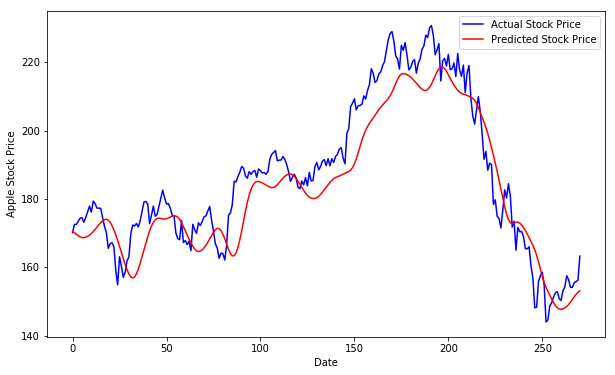

In [57]:
#and plot results:

plt.figure(figsize=(10,6))  
plt.plot(series[-271:,], color='blue', label='Actual Stock Price')  
plt.plot(predictions , color='red', label='Predicted Stock Price')  
plt.xlabel('Date')  
plt.ylabel('Apple Stock Price')  
plt.legend()  
plt.show() 